The central limit theorem (CLT) is one of the most important results of probability theory and serves as the foundation of many methods of statistical analysis. At a high level, the theorem states the distribution of many sample means, known as a sampling distribution, will be normally distributed. This rule holds even if the underlying distribution itself is not normally distributed. As a result we can treat the sample mean as if it were drawn normal distribution.

Unfortunately, real world data is often not normally distributed and the distribution of a sample tends to mirror the distribution of the population. This means a sample taken from a population with a skewed distribution will also tend to be skewed. Let's investigate by plotting the data and sample we created earlier and by checking the skew:

45.002372

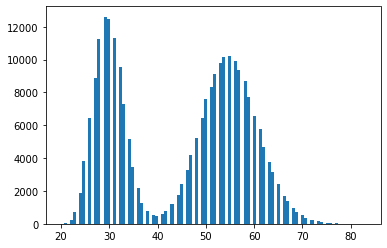

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import bernoulli, norm, poisson
from scipy.stats import kurtosis, skew
import seaborn as sns
import matplotlib.pyplot as plt
import random
import math


np.random.seed(10)
population_ages1 = stats.poisson.rvs(loc=20, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=20, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))
plt.hist(population_ages , bins=100);
population_ages.mean()

-0.12008483603917186


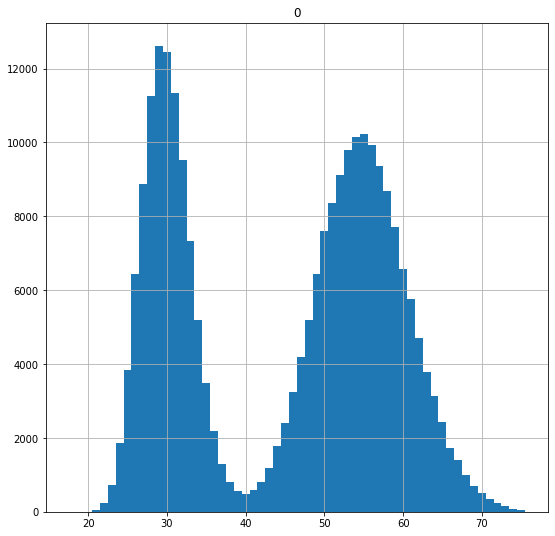

In [ ]:
pd.DataFrame(population_ages).hist(bins=58,
                                  range=(17.5,75.5),
                                  figsize=(9,9))

print( stats.skew(population_ages) );

The distribution has low skewness, but the plot reveals the data is clearly not normal: instead of one symmetric bell curve, it has as bimodal distribution with two high density peaks. The sample we drew from this population should have roughly the same shape and skew:

0.004370851565068423


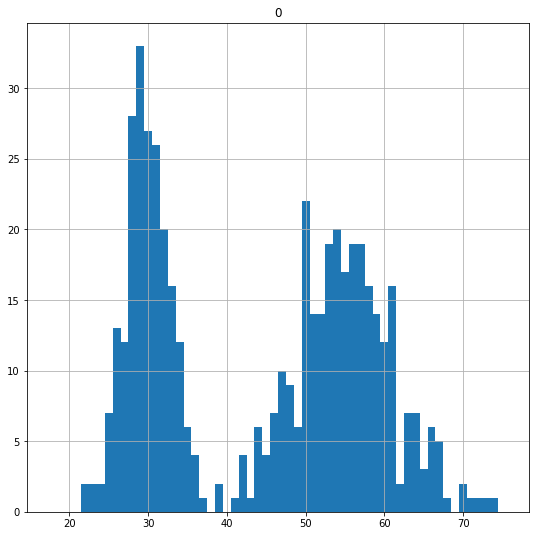

In [ ]:
# Sample 500 values
np.random.seed(10)
sample_ages = np.random.choice(a = population_ages, size=500)
pd.DataFrame(sample_ages).hist(bins=58,
                                  range=(17.5,75.5),
                                  figsize=(9,9));

print( stats.skew(sample_ages) )

## NEED FOR CENTRAL LIMIT THEOREM

The sample has roughly the same shape as the underlying population. This suggests that we can't apply techniques that assume a normal distribution to this data set, since it is not normal.

But this can be relsoved using CLT

**Illustration:**

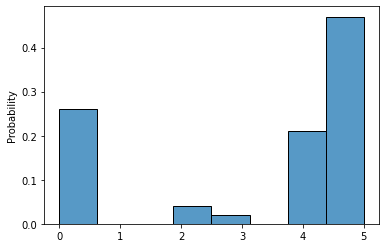

In [ ]:
# Let’s define a clearly non-normal distribution.

elements = np.arange(6)
probabilities = [0.3, 0., 0.05, 0.05, 0.2, 0.4]
X = np.random.choice(elements, 100, p=probabilities)
sns.histplot(X, stat='probability');


Now, we can draw samples from it. We are going to draw samples of size 4 and calculate its mean.

In [ ]:
s_1 = np.random.choice(elements, 4, p=probabilities)
print(s_1)
x_bar_1 = np.mean(s_1)
print(x_bar_1)

[0 5 4 0]
2.25


Let’s do the same procedure 10,000 times.

Kurtosis: -0.37
Skew: -0.27
---
μ=3.04
σ=1.06


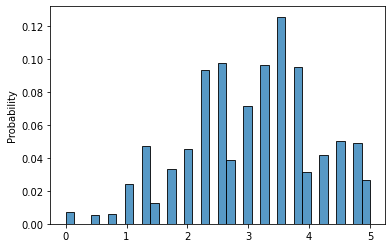

In [ ]:
s = []
n=4
for i in range(10000):
    s.append(np.random.choice(elements, n, p=probabilities))
s = np.mean(np.asarray(s), axis=1)

print('Kurtosis: ' + str(np.round(kurtosis(s),2)))
print('Skew: ' + str(np.round(skew(s),2)))
print('---')
print('μ=' + str(np.round(np.mean(s), 2)))
print('σ=' + str(np.round(np.std(s), 2)))
sns.histplot(s, stat='probability');

The CTL tells us that as you take more samples and calculate their mean, the resulting distribution will approximate a normal distribution. We can measure it by the value of the skewness and kurtosis, which for a normal distribution should be zero. A positively skewed distribution has a tail to the right, while a negative one has a tail to the left. If the distribution has positive kurtosis, it has fatter tails than the normal distribution; conversely, the tails would be thinner in a negative scenario.

What the CLT also tells us is that the approximation becomes better as the sample size increases. So let’s test it by increasing the sample size from 4 to 20 and then to 100.

Kurtosis: -0.03
Skew: -0.14
---
μ=3.05
σ=0.47


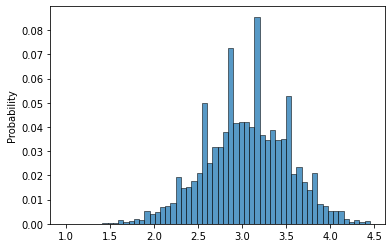

In [ ]:
s = []
n=20
for i in range(10000):
    s.append(np.random.choice(elements, n, p=probabilities))
s = np.mean(np.asarray(s), axis=1)

print('Kurtosis: ' + str(np.round(kurtosis(s),2)))
print('Skew: ' + str(np.round(skew(s),2)))
print('---')
print('μ=' + str(np.round(np.mean(s), 2)))
print('σ=' + str(np.round(np.std(s), 2)))
sns.histplot(s, stat='probability');

Kurtosis: -0.06
Skew: -0.04
---
μ=3.05
σ=0.21


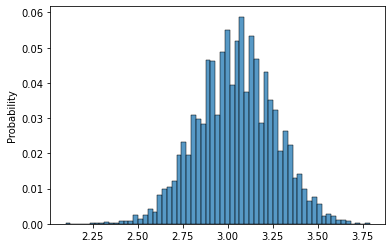

In [ ]:
s = []
n=100
for i in range(10000):
    s.append(np.random.choice(elements, n, p=probabilities))
s = np.mean(np.asarray(s), axis=1)

print('Kurtosis: ' + str(np.round(kurtosis(s),2)))
print('Skew: ' + str(np.round(skew(s),2)))
print('---')
print('μ=' + str(np.round(np.mean(s), 2)))
print('σ=' + str(np.round(np.std(s), 2)))
sns.histplot(s, stat='probability');

Notice how the last plot resembles a normal distribution. There is a convention that a sample size bigger than 30 is enough to approximate a normal distribution. Also, notice that the value of the mean and standard deviation of the sampling distribution that we have been plotting for the different sample sizes. Not surprisingly, the mean is the same as the original distribution. But the value for the standard deviation is indeed strange, as it has been shrinking. In fact, this is an important property to take note of: the standard deviation of our sampling distribution of sample means is the square root of the standard deviation of the original population divided by the sample size.

## practice question 
EXPONENTIAL VIA CENTRAL LIMIT THEOREM.